# Age and Sex analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing the data:
CSV_PATH = "..\data\clean_data.csv"
N_ROWS = None

df = pd.read_csv(CSV_PATH, nrows=N_ROWS)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gerar\AppData\Local\Temp\ipykernel_976\792364915.py:2: SyntaxWarning: invalid escape sequence '\d'
  CSV_PATH = "..\data\clean_data.csv"


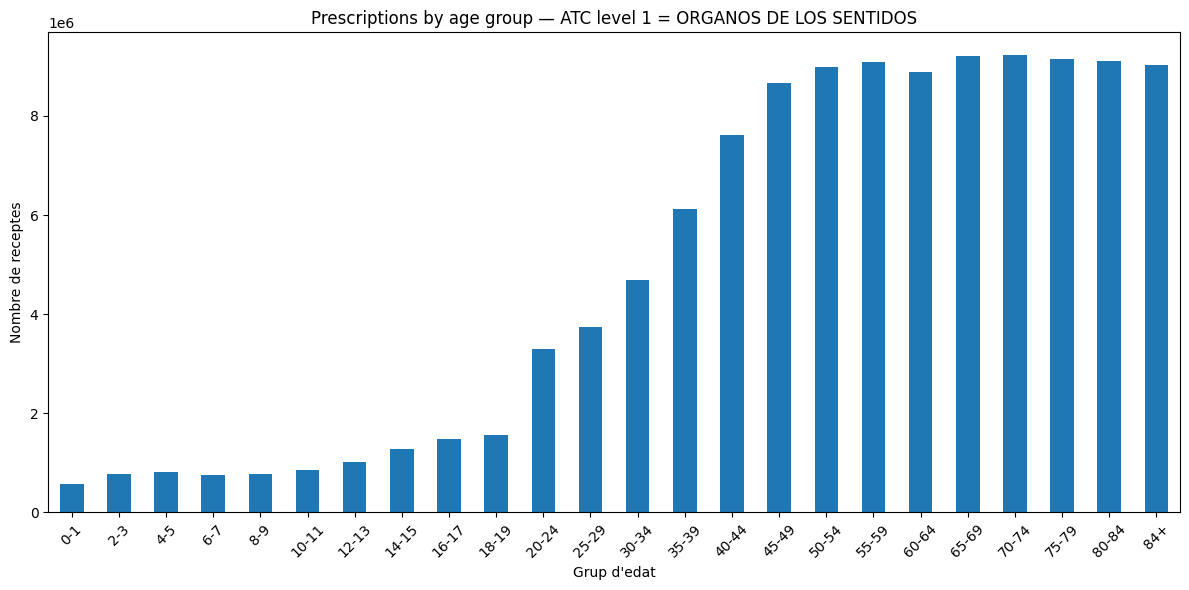

In [4]:
# --- define the correct age order ---
age_order = [
        "0-1", "2-3", "4-5", "6-7", "8-9",
        "10-11", "12-13", "14-15", "16-17", "18-19",
        "20-24", "25-29", "30-34", "35-39", "40-44",
        "45-49", "50-54", "55-59", "60-64", "65-69",
        "70-74", "75-79", "80-84", "84+"
    ]

for selected_atc in df["grup ATC nivell 1"].unique():   
    
    tmp = (
        df[df["grup ATC nivell 1"] == selected_atc]
        .groupby("grup d'edat")["nombre de receptes"]
        .sum()
        .reindex(age_order)        # enforce correct order
    )
    
    tmp.plot(kind="bar", figsize=(12,6))
    
    plt.xlabel("Grup d'edat")
    plt.ylabel("Nombre de receptes")
    plt.title(f"Prescriptions by age group — ATC level 1 = {selected_atc}")
    plt.xticks(rotation=45)
    plt.tight_layout()

    path = "../plots/age_and_sex/atc_1/age_atc1_{}.pdf".format(selected_atc.replace(" ", "_"))
    plt.savefig(path)

# ATC 2

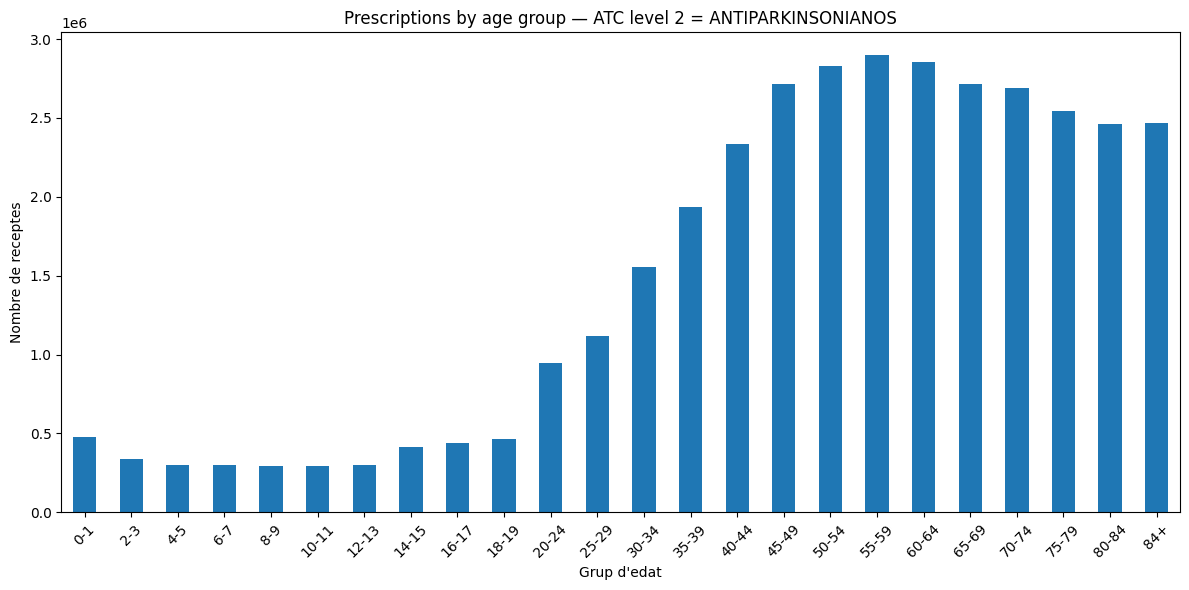

In [6]:
df_atc_2 = df[df["grup ATC nivell 1"] == "SISTEMA NERVIOSO"]

for selected_atc_2 in df_atc_2["grup ATC nivell 2"].unique():   
    
    tmp = (
        df_atc_2[df_atc_2["grup ATC nivell 2"] == selected_atc_2]
        .groupby("grup d'edat")["nombre de receptes"]
        .sum()
        .reindex(age_order)        # enforce correct order
    )
    
    tmp.plot(kind="bar", figsize=(12,6))
    
    plt.xlabel("Grup d'edat")
    plt.ylabel("Nombre de receptes")
    plt.title(f"Prescriptions by age group — ATC level 2 = {selected_atc_2}")
    plt.xticks(rotation=45)
    plt.tight_layout()

    path = "../plots/age_and_sex/atc_2_nervous/age_nervous_atc2_{}.pdf".format(selected_atc_2.replace(" ", "_"))
    plt.savefig(path)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# ensure output dir exists
outdir = Path("../plots/age_and_sex/atc_1_pyramids")
outdir.mkdir(parents=True, exist_ok=True)

# Your ordered age categories
age_order = [
    "0-1", "2-3", "4-5", "6-7", "8-9",
    "10-11", "12-13", "14-15", "16-17", "18-19",
    "20-24", "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-59", "60-64", "65-69",
    "70-74", "75-79", "80-84", "84+"
]

for atc1 in df["grup ATC nivell 1"].unique():
    
    # --- filter to this ATC1 ---
    df_atc = df[df["grup ATC nivell 1"] == atc1]

    # --- group by age × sex ---
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
    )

    # reorder age axis
    grouped = grouped.reindex(age_order)

    # ensure both columns exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # convert to proportions (optional: remove this block to plot raw counts)
    grouped_norm = grouped.div(grouped.sum(axis=1).replace(0, 1), axis=0)

    # prepare mirrored values
    males = -grouped_norm["Home"]   # left side negative
    females = grouped_norm["Dona"]  # right side positive

    # --- plot ---
    plt.figure(figsize=(12, 7))

    plt.barh(grouped_norm.index, males, color="steelblue", label="Homes")
    plt.barh(grouped_norm.index, females, color="salmon", label="Dones")

    plt.xlabel("Proporció de receptes")
    plt.ylabel("Grup d'edat")
    plt.title(f"Piramide d'edat i sexe — ATC nivell 1 = {atc1}")

    plt.legend(loc="lower right")
    plt.tight_layout()

    # fix x-axis ticks: show positive labels only
    xticks = plt.gca().get_xticks()
    plt.gca().set_xticklabels([f"{abs(x):.2f}" for x in xticks])

    # --- save ---
    safe_name = atc1.replace(" ", "_")
    outfile = outdir / f"pyramid_atc1_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


C:\Users\gerar\AppData\Local\Temp\ipykernel_976\1190511823.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{abs(x):.2f}" for x in xticks])
C:\Users\gerar\AppData\Local\Temp\ipykernel_976\1190511823.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{abs(x):.2f}" for x in xticks])
C:\Users\gerar\AppData\Local\Temp\ipykernel_976\1190511823.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{abs(x):.2f}" for x in xticks])
C:\Users\gerar\AppData\Local\Temp\ipykernel_976\1190511823.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{abs

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# ensure output dir exists
outdir = Path("../plots/age_and_sex/atc_1_stacked")
outdir.mkdir(parents=True, exist_ok=True)

# Your ordered age categories
age_order = [
    "0-1", "2-3", "4-5", "6-7", "8-9",
    "10-11", "12-13", "14-15", "16-17", "18-19",
    "20-24", "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-59", "60-64", "65-69",
    "70-74", "75-79", "80-84", "84+"
]

for atc1 in df["grup ATC nivell 1"].unique():
    
    # --- filter to this ATC1 ---
    df_atc = df[df["grup ATC nivell 1"] == atc1]

    # --- group by age × sex ---
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
    )

    # reorder age axis
    grouped = grouped.reindex(age_order)

    # ensure both columns exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # convert to proportions per age group
    grouped_norm = grouped.div(grouped.sum(axis=1).replace(0, 1), axis=0)

    # --- plot stacked vertical bars ---
    plt.figure(figsize=(12, 6))

    plt.bar(
        grouped_norm.index,
        grouped_norm["Home"],
        label="Homes",
        color="steelblue"
    )

    plt.bar(
        grouped_norm.index,
        grouped_norm["Dona"],
        bottom=grouped_norm["Home"],
        label="Dones",
        color="salmon"
    )

    plt.ylabel("Proporció de receptes")
    plt.xlabel("Grup d'edat")
    plt.xticks(rotation=45)
    plt.title(f"Distribució d'edat i sexe — ATC nivell 1 = {atc1}")

    plt.legend()
    plt.tight_layout()

    # --- save ---
    safe_name = atc1.replace(" ", "_")
    outfile = outdir / f"stacked_atc1_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


In [11]:
df_nerv = df[df["grup ATC nivell 1"] == "SISTEMA NERVIOSO"] 

# ensure output dir exists
outdir = Path("../plots/age_and_sex/atc_2_stacked")
outdir.mkdir(parents=True, exist_ok=True)


for atc2 in df_nerv["grup ATC nivell 2"].unique():
    
    # --- filter to this ATC1 ---
    df_atc = df_nerv[df_nerv["grup ATC nivell 2"] == atc2]

    # --- group by age × sex ---
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
    )

    # reorder age axis
    grouped = grouped.reindex(age_order)

    # ensure both columns exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # convert to proportions per age group
    grouped_norm = grouped.div(grouped.sum(axis=1).replace(0, 1), axis=0)

    # --- plot stacked vertical bars ---
    plt.figure(figsize=(12, 6))

    plt.bar(
        grouped_norm.index,
        grouped_norm["Home"],
        label="Homes",
        color="steelblue"
    )

    plt.bar(
        grouped_norm.index,
        grouped_norm["Dona"],
        bottom=grouped_norm["Home"],
        label="Dones",
        color="salmon"
    )

    plt.ylabel("Proporció de receptes")
    plt.xlabel("Grup d'edat")
    plt.xticks(rotation=45)
    plt.title(f"Distribució d'edat i sexe — ATC nivell 2 = {atc2}")

    plt.legend()
    plt.tight_layout()

    # --- save ---
    safe_name = atc2.replace(" ", "_")
    outfile = outdir / f"stacked_atc2_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


In [12]:
# ensure output dir exists
outdir = Path("../plots/age_and_sex/atc_3_stacked")
outdir.mkdir(parents=True, exist_ok=True)


for atc3 in df_nerv["grup ATC nivell 3"].unique():
    
    # --- filter to this ATC1 ---
    df_atc = df_nerv[df_nerv["grup ATC nivell 3"] == atc3]

    # --- group by age × sex ---
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
    )

    # reorder age axis
    grouped = grouped.reindex(age_order)

    # ensure both columns exist
    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # convert to proportions per age group
    grouped_norm = grouped.div(grouped.sum(axis=1).replace(0, 1), axis=0)

    # --- plot stacked vertical bars ---
    plt.figure(figsize=(12, 6))

    plt.bar(
        grouped_norm.index,
        grouped_norm["Home"],
        label="Homes",
        color="steelblue"
    )

    plt.bar(
        grouped_norm.index,
        grouped_norm["Dona"],
        bottom=grouped_norm["Home"],
        label="Dones",
        color="salmon"
    )

    plt.ylabel("Proporció de receptes")
    plt.xlabel("Grup d'edat")
    plt.xticks(rotation=45)
    plt.title(f"Distribució d'edat i sexe — ATC nivell 2 = {atc3}")

    plt.legend()
    plt.tight_layout()

    # --- save ---
    safe_name = atc3.replace(" ", "_")
    outfile = outdir / f"stacked_atc3_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

outdir = Path("../plots/age_and_sex/atc_1_continuous")
outdir.mkdir(parents=True, exist_ok=True)


for atc1 in df["grup ATC nivell 1"].unique():
    
    # Filter
    df_atc = df[df["grup ATC nivell 1"] == atc1]

    # Group
    grouped = (
        df_atc.groupby(["grup d'edat", "sexe"])["nombre de receptes"]
              .sum()
              .unstack(fill_value=0)
              .reindex(age_order)
    )

    for col in ["Home", "Dona"]:
        if col not in grouped.columns:
            grouped[col] = 0

    # Proportions
    total_per_age = grouped.sum(axis=1)
    grouped_norm = grouped.div(total_per_age.replace(0, 1), axis=0)

    # Numerical x for continuous plot
    x = np.arange(len(age_order))

    # Continuous stacked area
    male_area = grouped_norm["Home"].values
    female_area = grouped_norm["Dona"].values

    # Dynamic alpha (volume → opacity)
    # normalise counts 0..1
    # log-scaled alpha
    vol = total_per_age.replace(0, 1)
    log_vol = np.log1p(vol)
    alpha_levels = (log_vol - log_vol.min()) / (log_vol.max() - log_vol.min() + 1e-9)
    
    # enforce minimum opacity
    alpha_levels = 0.3 + 0.7 * alpha_levels


    # Base colors
    male_color = np.array([70/255, 130/255, 180/255])     # steelblue
    female_color = np.array([250/255, 128/255, 114/255])  # salmon

    # Create figure
    plt.figure(figsize=(12, 6))

    # For each age group, draw a quad with interpolated alpha
    for i in range(len(x)-1):
        plt.fill_between(
            [x[i], x[i+1]],
            [0, 0],
            [male_area[i], male_area[i+1]],
            color=male_color,
            alpha=float(alpha_levels[i])
        )
        plt.fill_between(
            [x[i], x[i+1]],
            [male_area[i], male_area[i+1]],
            [male_area[i]+female_area[i], male_area[i+1]+female_area[i+1]],
            color=female_color,
            alpha=float(alpha_levels[i])
        )

    # Axis labels
    plt.xticks(x, age_order, rotation=45)
    plt.ylabel("Proporció (Homes + Dones)")
    plt.xlabel("Grup d'edat")
    plt.title(f"Distribució d'edat i sexe (continu) — ATC nivell 1 = {atc1}")

    # Legend patches
    plt.scatter([], [], color=male_color, label="Homes")
    plt.scatter([], [], color=female_color, label="Dones")
    plt.legend()

    plt.tight_layout()

    # Save
    safe_name = atc1.replace(" ", "_")
    outfile = outdir / f"continuous_stacked_atc1_{safe_name}.pdf"
    plt.savefig(outfile)
    plt.close()


C:\Users\gerar\AppData\Local\Temp\ipykernel_976\2048694126.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=float(alpha_levels[i])
C:\Users\gerar\AppData\Local\Temp\ipykernel_976\2048694126.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=float(alpha_levels[i])
C:\Users\gerar\AppData\Local\Temp\ipykernel_976\2048694126.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=float(alpha_levels[i])
C:\Users\gera

# Ridgeline

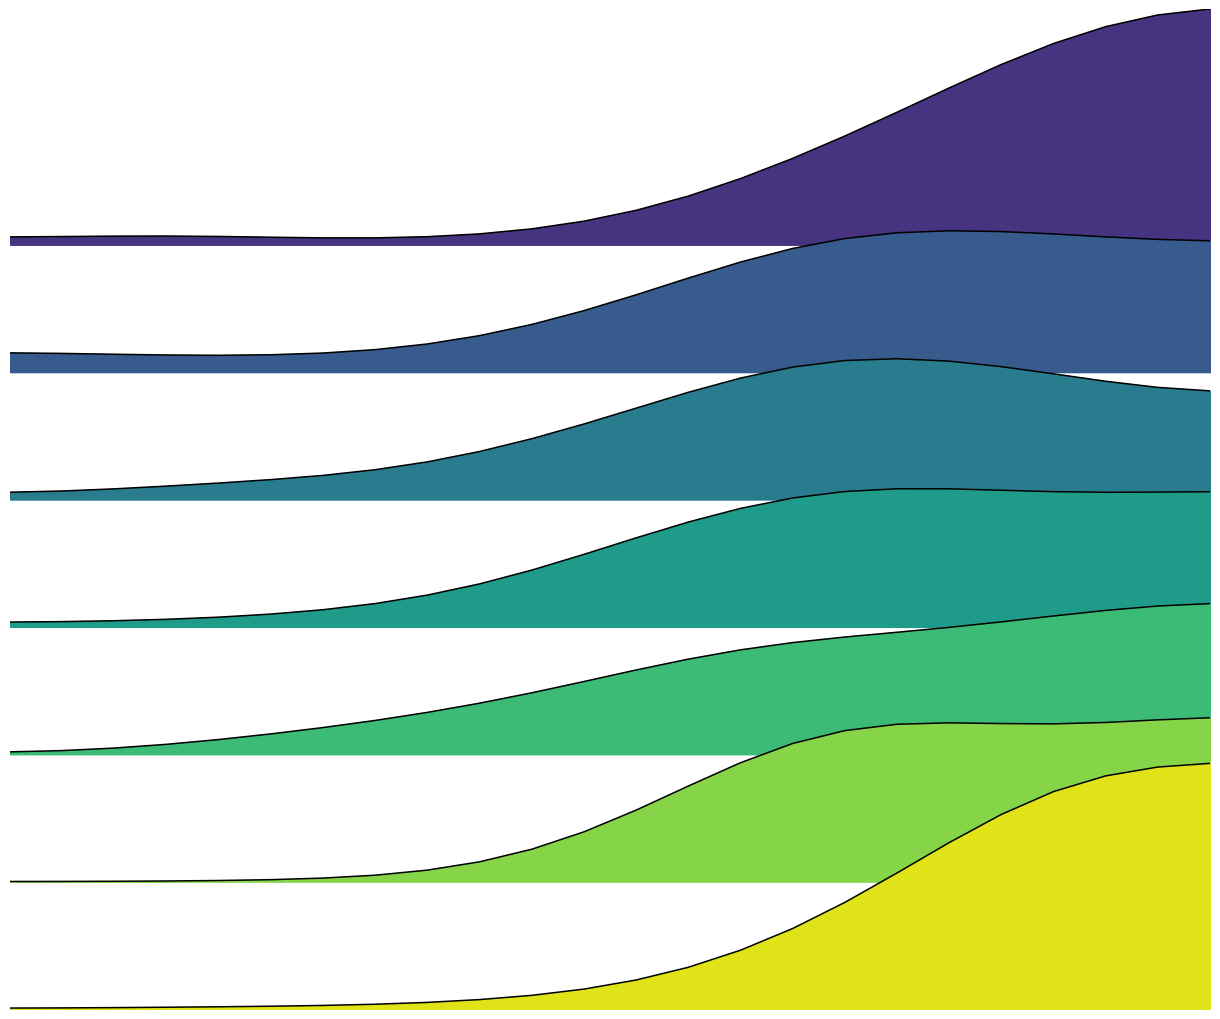

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.cm as cm


atc2_values = df_nerv["grup ATC nivell 2"].unique()
n_atc = len(atc2_values)

ridge_scale = 20
offset = -1.4  

# ---- FIGURE ----
fig, ax = plt.subplots(figsize=(12, 10))

# color palette
colors = cm.viridis(np.linspace(0.15, 0.95, n_atc))

for i, (atc2, color) in enumerate(zip(atc2_values, colors)):

    tmp = (
        df_nerv[df_nerv["grup ATC nivell 2"] == atc2]
        .groupby("grup d'edat")["nombre de receptes"]
        .sum()
        .reindex(age_order)
        .fillna(0)
    )

    y = tmp / tmp.sum() if tmp.sum() > 0 else tmp
    y = y.values

    y_smooth = gaussian_filter1d(y, sigma=2)
    y_smooth = gaussian_filter1d(y_smooth, sigma=1.2)
    y_scaled = y_smooth * ridge_scale

    baseline = i * offset

    ax.fill_between(
        np.arange(len(age_order)),
        baseline,
        baseline + y_scaled,
        color=color,
        alpha=1
    )

    ax.plot(
        np.arange(len(age_order)),
        baseline + y_scaled,
        color="black",
        linewidth=1.1
    )

# ---- REMOVE ALL AXES, SPINES, TICKS ----
ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_frame_on(False)

# remove margins so the plot fills entire canvas
plt.margins(0, 0)

# turn off axis completely (optional but cleanest)
ax.axis("off")

plt.subplots_adjust(
    left=0, right=1, top=1, bottom=0,
    wspace=0, hspace=0
)

plt.savefig("../plots/age_and_sex/ridgeline_atc2.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()
